In [35]:
%matplotlib inline

import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage

from numpy import reshape,uint8
from scipy import misc
from skimage.transform import resize
from skimage.transform import rotate

#with adapt_rgb one can use grayscale functions with RGB images
from skimage.color.adapt_rgb import adapt_rgb, hsv_value

DATAFOLDER = 'data'
IMAGE_FOLDER = os.path.join(DATAFOLDER, 'roof_images')

In [36]:
df = pd.read_csv(os.path.join(DATAFOLDER, 'id_train.csv'))
ids = list(df['Id'])
print(len(ids))
df.head()

8000


,Id,label
0,-3935637,4
1,-2815459,3
2,-2355684,3
3,-2343303,4
4,-1981985,2


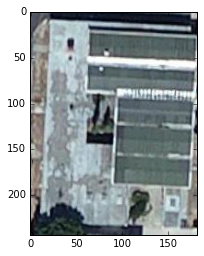

In [37]:
img_path = os.path.join(IMAGE_FOLDER, str(ids[1]) + '.jpg')
img = misc.imread(img_path)
plt.imshow(img)

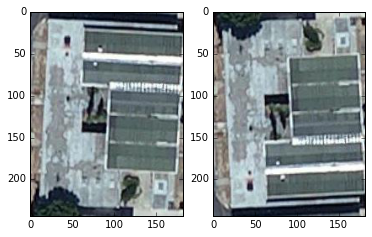

In [38]:
# horizontal flip
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(img)
ax2.imshow(img[::-1,:,:])

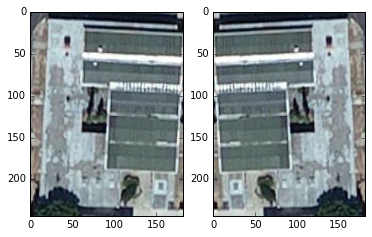

In [39]:
# Vertical flip
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(img)
ax2.imshow(img[:,::-1,:])

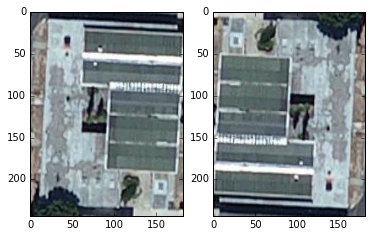

In [40]:
# Rotation 180°
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(img)
ax2.imshow(img[::-1,::-1,:])

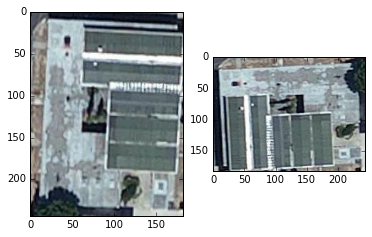

In [41]:
# Transposition
new_img = np.zeros((img.shape[1], img.shape[0], img.shape[2]),dtype='uint8')
for i in range(3):
    new_img[:,:,i] = img[:,:,i].transpose()
    
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(img)
ax2.imshow(new_img)

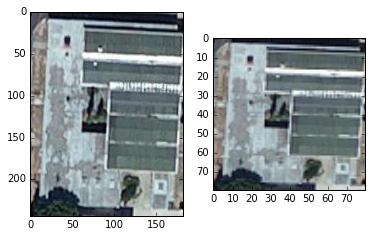

In [42]:
# Resize and crop into a square with width = 80
new_size = 80
new_img = resize(img,(new_size, new_size, 3))

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(img)
ax2.imshow(new_img)

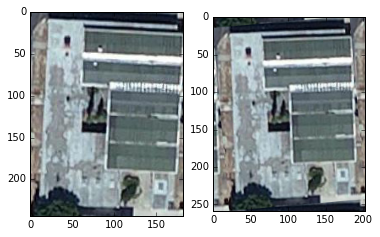

In [43]:
# Rotation
angle = 5
new_img = rotate(img, angle, resize=True, mode='wrap')

# ‘constant’, ‘edge’, ‘symmetric’, ‘reflect’, 

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(img)
ax2.imshow(new_img)

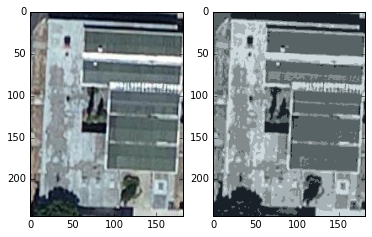

In [44]:
#K-Means clustering
from sklearn.cluster import KMeans
n_clusters = 5
w, l, d = img.shape
img_reshaped = np.reshape(img.astype(np.float32), (w * l, 3)) / 255
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(img_reshaped)
labels = kmeans.predict(img_reshaped)
new_img = np.zeros((w, l ,3))
label_idx = 0
codebook = kmeans.cluster_centers_
for i in range(w):
    for j in range(l):
        new_img[i][j] = codebook[labels[label_idx]]
        label_idx += 1

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(img)
ax2.imshow(new_img)

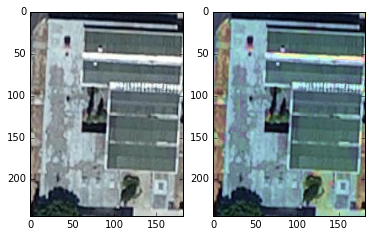

In [45]:
# Increase Saturation
from skimage.color import rgb2hsv, hsv2rgb
a = 0.2
new_img = rgb2hsv(img)
new_img[:,:,1] += a * (1 - new_img[:,:,1])
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(img)
ax2.imshow(hsv2rgb(new_img))

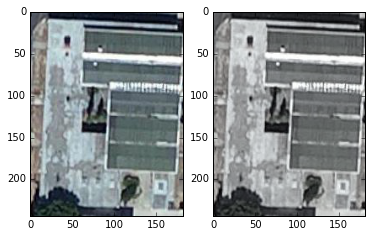

In [46]:
# Lower Saturation
from skimage.color import rgb2hsv, hsv2rgb
new_img = rgb2hsv(img)
new_img[:,:,1] -= 0.8 * new_img[:,:,1]
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(img)
ax2.imshow(hsv2rgb(new_img))

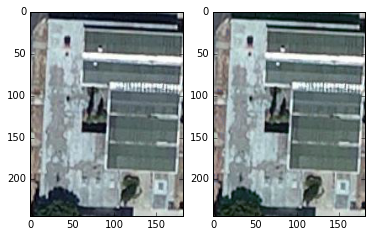

In [47]:
# Saturation
from skimage.color import rgb2hsv, hsv2rgb
a = 0.2
new_img = rgb2hsv(img)
#new_img[:,:,0] += a * (1 - new_img[:,:,1])
new_img[:,:,0] -= a * new_img[:,:,1]
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(img)
ax2.imshow(hsv2rgb(new_img))

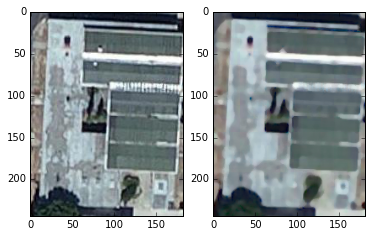

In [88]:
#Median filter
from skimage.filters.rank import median
from skimage.morphology import disk
@adapt_rgb(hsv_value)
def noiseremoval(img):
    return median(img,disk(4))
new_img = noiseremoval(img)
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(img)
ax2.imshow(new_img)

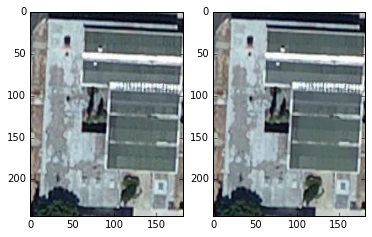

In [90]:
#Image smoothing
#The bilateral filter allows to preserve important borders while smoothing the image
from skimage.filters.rank import mean_bilateral
@adapt_rgb(hsv_value)
def mean_b(img):
    return mean_bilateral(img,disk(10),s0=10,s1=10)
new_img = mean_b(img)
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(img)
ax2.imshow(new_img)
# PAS GRAND N A CHANGE SUR LA PHOTO

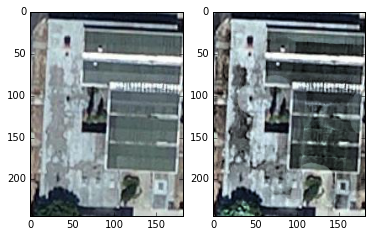

In [95]:
#Autolevel
from skimage.filters.rank import autolevel
@adapt_rgb(hsv_value)
def autoL(img):
    return autolevel(img,disk(15))
new_img = autoL(img)
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(img)
ax2.imshow(new_img)

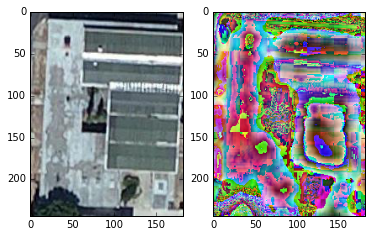

In [110]:
#FeatureExtraction
# PROBABLEMENT INUTILE
from skimage.filters.rank import entropy
from skimage.morphology import disk
@adapt_rgb(hsv_value)
def featureExt(img):
    return entropy(img,disk(20.))
new_img = featureExt(img)
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(img)
ax2.imshow(new_img)

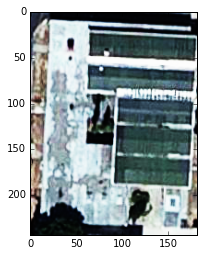

In [111]:
#Contrast adjustment
from skimage.exposure import adjust_sigmoid
new_img = adjust_sigmoid(img)
plt.imshow(new_img)
